In [26]:
import geopandas as gpd

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import statsmodels.api as sm

def partial_spearman(y, x, control):
    # Rank transform the variables
    y_rank = pd.Series(y).rank()
    x_rank = pd.Series(x).rank()
    control_rank = pd.Series(control).rank()

    # Regress out control from y and x
    control_with_const = sm.add_constant(control_rank)
    y_resid = sm.OLS(y_rank, control_with_const).fit().resid
    x_resid = sm.OLS(x_rank, control_with_const).fit().resid

    # Compute Spearman correlation of residuals
    rho, p = spearmanr(y_resid, x_resid)
    return rho, p



In [28]:
i=300

In [29]:
stn_buffers = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/270623_processed_station_params_' + str(i) + '.parquet')

In [30]:
# spearman correlation of data
from scipy.stats import pearsonr, spearmanr
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuERI_wsum','BuHt_wsum','BuRough_3D_wsum']

for i in params:

    data = stn_buffers[[i,'Temperature_diff_K']].dropna()
    spearman = spearmanr(data[i], data['Temperature_diff_K'])
    print(i, spearman)

BuAre_sum SignificanceResult(statistic=0.7195245121533279, pvalue=0.0)
BuVol_3D_sum SignificanceResult(statistic=0.7238714707106089, pvalue=0.0)
BuEWA_3D_sum SignificanceResult(statistic=0.7004659564158483, pvalue=0.0)
BuIBD SignificanceResult(statistic=-0.4861278459702284, pvalue=0.0)
BuAdj SignificanceResult(statistic=-0.6087434980924655, pvalue=0.0)
BuSWR_3D_median SignificanceResult(statistic=0.5164056794403572, pvalue=0.0)
BuHt_wmean SignificanceResult(statistic=0.571760902809407, pvalue=0.0)
StrHW_median SignificanceResult(statistic=0.5233956650473369, pvalue=0.0)
SVF_3D_mean SignificanceResult(statistic=-0.7082080163057006, pvalue=0.0)
BuERI_mode SignificanceResult(statistic=-0.5224129377333145, pvalue=0.0)
StrClo400_median SignificanceResult(statistic=0.398533351005574, pvalue=1.9268951463029676e-200)
BuERI_wsum SignificanceResult(statistic=0.7150755929360922, pvalue=0.0)
BuHt_wsum SignificanceResult(statistic=0.72399714347843, pvalue=0.0)
BuRough_3D_wsum SignificanceResult(sta

In [39]:
params = ['BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuERI_wsum','BuHt_wsum','BuRough_3D_wsum']

# loop through parameters and calculate partial spearman correlation for each parameter to get a matrix of partial correlations
partial_corr_matrix = pd.DataFrame(index=params, columns=params)
for i in params:
    for j in params:
        if i == j:
            partial_corr_matrix.loc[i, j] = 0
        else:
            data = stn_buffers[['Temperature_diff_K',i,j]].dropna()
            rho, p = partial_spearman(data['Temperature_diff_K'], data[i], data[j])
            partial_corr_matrix.loc[i, j] = rho

In [40]:
partial_corr_matrix

,BuAre_sum,BuVol_3D_sum,BuEWA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,SVF_3D_mean,BuERI_mode,StrClo400_median,BuERI_wsum,BuHt_wsum,BuRough_3D_wsum
BuAre_sum,0,0.068466,0.244892,0.567196,0.430666,0.519614,0.506213,0.441208,0.317486,0.558777,0.585398,0.066101,0.06816,0.018218
BuVol_3D_sum,0.200862,0,0.327193,0.587009,0.431694,0.525973,0.512147,0.458843,0.33477,0.566696,0.59208,0.216118,0.002935,0.096959
BuEWA_3D_sum,-0.035345,-0.182701,0,0.54202,0.385326,0.480616,0.447073,0.395312,0.207165,0.533079,0.552469,0.007664,-0.186315,-0.025876
BuIBD,0.091669,0.05977,0.08201,0,-0.023439,-0.1427,-0.244742,-0.11158,0.045491,-0.342622,-0.231444,0.115284,0.059827,0.00108
BuAdj,-0.234905,-0.201296,-0.234422,-0.434867,0,-0.354778,-0.40326,-0.32062,-0.26282,-0.483779,-0.453037,-0.226572,-0.198904,-0.232483
BuSWR_3D_median,0.092124,0.065857,0.094549,0.277325,-0.035222,0,0.301661,0.180353,0.124318,0.39716,0.257543,0.076702,0.064488,0.113631
BuHt_wmean,0.142913,-0.093011,0.049373,0.411397,0.233944,0.345049,0,0.150228,0.138482,0.39518,0.426562,0.168296,-0.095351,0.094991
StrHW_median,0.097883,-0.025407,0.071547,0.347189,0.18286,0.287521,0.206261,0,0.126145,0.395508,0.367191,0.105566,-0.027822,0.106604
SVF_3D_mean,-0.026567,0.054915,0.016056,-0.480376,-0.364462,-0.440719,-0.403459,-0.350444,0,-0.494709,-0.517469,-0.023411,0.054103,-0.03269
BuERI_mode,-0.027718,-0.007231,-0.012912,-0.335119,-0.248487,-0.328306,-0.268627,-0.225962,-0.110703,0,-0.350913,-0.071756,-0.008893,0.00621


In [41]:
abs(partial_corr_matrix)

,BuAre_sum,BuVol_3D_sum,BuEWA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,SVF_3D_mean,BuERI_mode,StrClo400_median,BuERI_wsum,BuHt_wsum,BuRough_3D_wsum
BuAre_sum,0,0.068466,0.244892,0.567196,0.430666,0.519614,0.506213,0.441208,0.317486,0.558777,0.585398,0.066101,0.06816,0.018218
BuVol_3D_sum,0.200862,0,0.327193,0.587009,0.431694,0.525973,0.512147,0.458843,0.33477,0.566696,0.59208,0.216118,0.002935,0.096959
BuEWA_3D_sum,0.035345,0.182701,0,0.54202,0.385326,0.480616,0.447073,0.395312,0.207165,0.533079,0.552469,0.007664,0.186315,0.025876
BuIBD,0.091669,0.05977,0.08201,0,0.023439,0.1427,0.244742,0.11158,0.045491,0.342622,0.231444,0.115284,0.059827,0.00108
BuAdj,0.234905,0.201296,0.234422,0.434867,0,0.354778,0.40326,0.32062,0.26282,0.483779,0.453037,0.226572,0.198904,0.232483
BuSWR_3D_median,0.092124,0.065857,0.094549,0.277325,0.035222,0,0.301661,0.180353,0.124318,0.39716,0.257543,0.076702,0.064488,0.113631
BuHt_wmean,0.142913,0.093011,0.049373,0.411397,0.233944,0.345049,0,0.150228,0.138482,0.39518,0.426562,0.168296,0.095351,0.094991
StrHW_median,0.097883,0.025407,0.071547,0.347189,0.18286,0.287521,0.206261,0,0.126145,0.395508,0.367191,0.105566,0.027822,0.106604
SVF_3D_mean,0.026567,0.054915,0.016056,0.480376,0.364462,0.440719,0.403459,0.350444,0,0.494709,0.517469,0.023411,0.054103,0.03269
BuERI_mode,0.027718,0.007231,0.012912,0.335119,0.248487,0.328306,0.268627,0.225962,0.110703,0,0.350913,0.071756,0.008893,0.00621


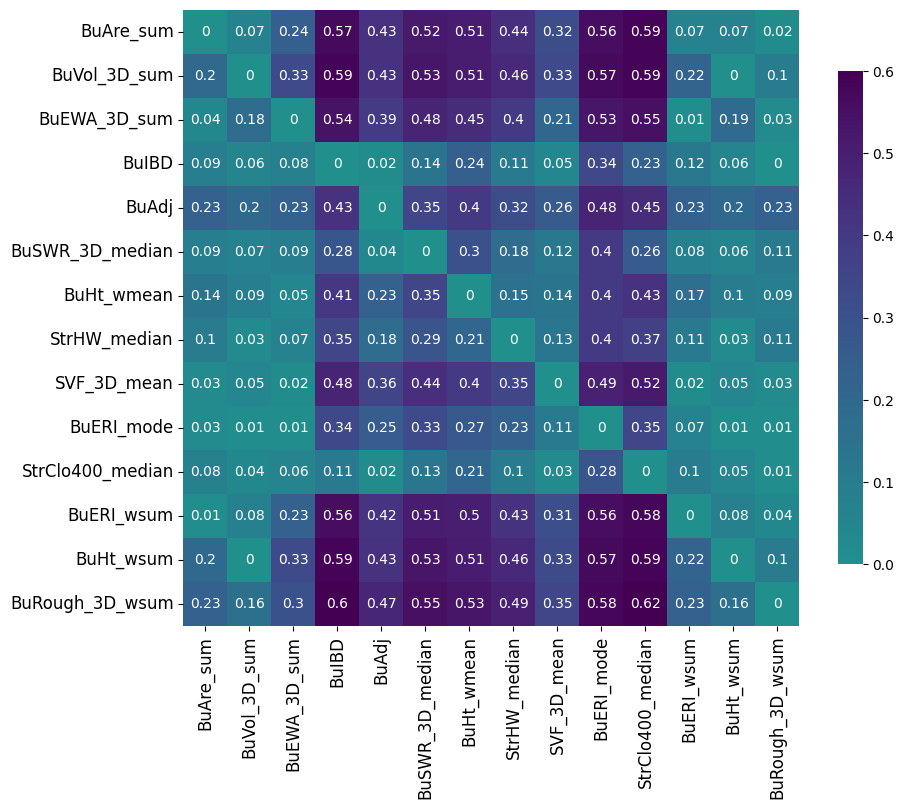

In [55]:
# make heatmap of partial correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(abs(partial_corr_matrix.astype(float)).round(2), annot=True, cmap='viridis_r', center=0, square=True, cbar_kws={"shrink": .8}, vmin=0, vmax=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/Users/lisawink/Documents/paper1/figures/fig14/partial_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lisawink/Documents/paper1/figures/fig14/partial_corr_matrix.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
params = ['BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuERI_wsum','BuHt_wsum','BuRough_3D_wsum']

for i in params:

    data = stn_buffers[['Temperature_diff_K',i,'BuAre_sum']].dropna()

    y = data['Temperature_diff_K']
    x2 = data[i]
    x1 = data['BuAre_sum']
    rho, pval = partial_spearman(y, x2, x1)
    print(f"{i},Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

In [64]:
params = ['BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuERI_wsum','BuHt_wsum','BuRough_3D_wsum']

for i in params:

    data = stn_buffers[['Temperature_diff_K',i,'BuAre_sum']].dropna()

    y = data['Temperature_diff_K']
    x2 = data[i]
    x1 = data['BuAre_sum']
    rho, pval = partial_spearman(y, x2, x1)
    print(f"{i},Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

    # Example DataFrame with outcome 'Y' and predictors 'X1', 'X2'
    df = pd.DataFrame({
        'Y': y,
        'X1': x1,
        'X2': x2
    })

    # Run dominance analysis
    dominance = Dominance(data=df, target='Y', objective=1)  # 1 = regression, 0 = classification
    dominance_stats = dominance.incremental_rsquare()

    # View incremental R² contributions
    print("Incremental R² for each variable (Shapley values):")
    print(dominance_stats)
    print('---------------------------------------------------------------------------------------------------------------')

BuVol_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.201, p=5.77e-52
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.47757076350505245

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 145.36it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 4744.69it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.2748689184390391, 'X2': 0.20270184506601335}
---------------------------------------------------------------------------------------------------------------
BuEWA_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: -0.035, p=0.00823
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.46660615311941556

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 172.38it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.2518259827668328, 'X2': 0.21478017035258273}
---------------------------------------------------------------------------------------------------------------
BuIBD,Partial Spearman correlation between Y and X2 controlling for X1: 0.092, p=1.53e-11
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4589001562493633

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 162.87it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 4782.56it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.3411159039242165, 'X2': 0.11778425232514683}
---------------------------------------------------------------------------------------------------------------
BuAdj,Partial Spearman correlation between Y and X2 controlling for X1: -0.235, p=4.98e-69
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4788134704871312

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 180.45it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 5356.71it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.27373469993816185, 'X2': 0.20507877054896934}
---------------------------------------------------------------------------------------------------------------
BuSWR_3D_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.092, p=1.11e-11
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.45981024260537906

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 181.85it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 50.80it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.3314443134749406, 'X2': 0.12836592913043848}
---------------------------------------------------------------------------------------------------------------
BuHt_wmean,Partial Spearman correlation between Y and X2 controlling for X1: 0.143, p=6.83e-27
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.48828986901097415

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 173.78it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 5315.97it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.3270235842767913, 'X2': 0.16126628473418286}
---------------------------------------------------------------------------------------------------------------
StrHW_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.098, p=2.93e-12
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4210618841860043

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 179.99it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.3081555854323103, 'X2': 0.11290629875369401}
---------------------------------------------------------------------------------------------------------------
SVF_3D_mean,Partial Spearman correlation between Y and X2 controlling for X1: -0.027, p=0.047
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4683242722868528

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 172.89it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 5614.86it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.25760472526007705, 'X2': 0.21071954702677576}
---------------------------------------------------------------------------------------------------------------
BuERI_mode,Partial Spearman correlation between Y and X2 controlling for X1: -0.028, p=0.0383
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4818969850122883

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 174.98it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 4271.19it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.32248138241555363, 'X2': 0.15941560259673465}
---------------------------------------------------------------------------------------------------------------
StrClo400_median,Partial Spearman correlation between Y and X2 controlling for X1: -0.084, p=8.87e-10
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4492531019198994

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 182.06it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 3938.31it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.36322901886491354, 'X2': 0.08602408305498588}
---------------------------------------------------------------------------------------------------------------
BuERI_wsum,Partial Spearman correlation between Y and X2 controlling for X1: 0.013, p=0.348
Selecting 2 Best Predictors for the Model


Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4706972599302863

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 174.68it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 4084.04it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.23316018779657194, 'X2': 0.2375370721337144}
---------------------------------------------------------------------------------------------------------------
BuHt_wsum,Partial Spearman correlation between Y and X2 controlling for X1: 0.200, p=9.35e-52
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.47701904410437035

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 163.15it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 12483.05it/s]


#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.2741090539662315, 'X2': 0.20290999013813887}
---------------------------------------------------------------------------------------------------------------
BuRough_3D_wsum,Partial Spearman correlation between Y and X2 controlling for X1: 0.226, p=2.14e-65
Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4920944157661391

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 175.69it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 7194.35it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.23338858460836687, 'X2': 0.25870583115777224}
---------------------------------------------------------------------------------------------------------------


In [79]:
df = stn_buffers[['Temperature_diff_K','BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuERI_wsum','BuHt_wsum','BuRough_3D_wsum']].dropna()
df = stn_buffers[['Temperature_diff_K','BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']].dropna()
X = df.drop(columns='Temperature_diff_K')
y = df['Temperature_diff_K']

# Combine again as expected by the package
df_full = pd.concat([y, X], axis=1)

# Run dominance analysis (objective=1 for regression; use 0 for classification)
dominance_reg = Dominance(data=df_full, target='Temperature_diff_K', objective=1)

# Get incremental R² (like Shapley values)
dominance_stats = dominance_reg.incremental_rsquare()
print("\nIncremental R² (Shapley values) for each predictor:")

Selecting 11 Best Predictors for the Model
Selected Predictors :  ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean', 'StrHW_median', 'SVF_3D_mean', 'BuERI_mode', 'StrClo400_median']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.5606257549803152

Selecting 11 Best Predictors for the Model
Selected Predictors :  ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean', 'StrHW_median', 'SVF_3D_mean', 'BuERI_mode', 'StrClo400_median']

Creating models for 2047 possible combinations of 11 features :


  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:07<00:00,  1.42it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 10/10 [00:00<00:00, 12.50it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################


Incremental R² (Shapley values) for each predictor:


In [66]:
dominance_stats

{'BuAre_sum': 0.060608813080017546,
 'BuVol_3D_sum': 0.039138303807556694,
 'BuEWA_3D_sum': 0.04159403473457485,
 'BuIBD': 0.014801284844611701,
 'BuAdj': 0.05961623560660457,
 'BuSWR_3D_median': 0.024521625306191557,
 'BuHt_wmean': 0.05708947852007114,
 'StrHW_median': 0.020129225410401044,
 'SVF_3D_mean': 0.03645859946772888,
 'BuERI_mode': 0.02716685547720251,
 'StrClo400_median': 0.02007464213768379,
 'BuERI_wsum': 0.056861990744936086,
 'BuHt_wsum': 0.03894521125956132,
 'BuRough_3D_wsum': 0.07321254150627297}

In [80]:
dominance_reg.plot_incremental_rsquare()

AttributeError: 'DataFrame' object has no attribute 'append'

In [19]:
df

,Temperature_diff_K,BuAre_sum,BuVol_3D_sum,BuEWA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,SVF_3D_mean,BuERI_mode,StrClo400_median,BuRough_3D_wsum
0,1.30,88611.064392,1.419363e+06,356116.386413,14.210120,0.316593,0.226575,16.088678,0.828041,0.726348,0.510927,0.000019,80898.284900
1,1.10,87945.342335,1.416225e+06,353928.535936,14.496523,0.333252,0.212780,16.174672,0.719806,0.733817,0.510927,0.000017,80032.293698
2,1.02,78953.475859,1.173644e+06,319341.437612,14.916552,0.359290,0.214372,14.934070,0.639352,0.746298,0.556153,0.000015,70812.779143
3,1.02,77989.530821,1.159853e+06,315972.447698,14.876094,0.359314,0.215963,14.941287,0.610363,0.746567,0.556153,0.000015,69021.019603
4,1.02,73037.647444,1.055864e+06,308325.986229,16.113767,0.417174,0.186234,14.499651,0.548229,0.751950,0.556153,0.000013,65432.815071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,-0.75,89538.392811,1.447345e+06,357100.320441,14.210719,0.322829,0.221957,16.235513,0.828041,0.726900,0.510927,0.000019,80993.454775
5937,-0.54,89442.584300,1.446028e+06,359930.485912,14.020836,0.316027,0.225701,16.238213,0.823423,0.725776,0.510927,0.000019,80778.206783
5938,-0.44,88410.156137,1.424107e+06,354690.005585,13.928590,0.310400,0.229856,16.179148,0.828041,0.723833,0.510927,0.000020,80722.173495
5939,-0.44,89368.249945,1.435355e+06,360215.607313,13.996876,0.310517,0.239904,16.131929,0.848238,0.722884,0.510927,0.000019,81591.473976


In [82]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def evaluate_combinations(df, target_col, max_vars=3, top_n=5):
    predictors = [col for col in df.columns if col != target_col]
    results_raw = []
    results_ranked = []

    # Rank-transform the data for Spearman-style regression
    df_ranked = df.rank()

    for k in [2, 3]:
        for combo in combinations(predictors, k):
            X = df[list(combo)]
            y = df[target_col]
            model = LinearRegression().fit(X, y)
            r2_raw = r2_score(y, model.predict(X))
            results_raw.append((combo, r2_raw))

            # Spearman-style (ranked)
            X_rank = df_ranked[list(combo)]
            y_rank = df_ranked[target_col]
            model_ranked = LinearRegression().fit(X_rank, y_rank)
            r2_ranked = r2_score(y_rank, model_ranked.predict(X_rank))
            results_ranked.append((combo, r2_ranked))

    # Sort and return top N
    top_raw = sorted(results_raw, key=lambda x: x[1], reverse=True)[:top_n]
    top_ranked = sorted(results_ranked, key=lambda x: x[1], reverse=True)[:top_n]

    return top_raw, top_ranked

# Example usage
# df: your DataFrame
# target_col: string name of the dependent variable (e.g. 'temp_mean_day')
target_col = 'Temperature_diff_K'  # change this!
top_raw, top_ranked = evaluate_combinations(df, target_col)

print("🔵 Top 5 R² (linear regression on original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 R² (linear regression on rank-transformed data):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")


🔵 Top 5 R² (linear regression on original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean') → R² = 0.495
('BuAre_sum', 'BuAdj', 'StrClo400_median') → R² = 0.466
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj') → R² = 0.457
('BuAre_sum', 'BuAdj', 'StrHW_median') → R² = 0.449
('BuAre_sum', 'BuEWA_3D_sum', 'BuHt_wmean') → R² = 0.442

🟢 Top 5 R² (linear regression on rank-transformed data):
('BuAre_sum', 'BuIBD', 'BuAdj') → Spearman-style R² = 0.480
('BuVol_3D_sum', 'BuIBD', 'BuAdj') → Spearman-style R² = 0.470
('BuAre_sum', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.470
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.464
('BuVol_3D_sum', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.464


Cross Validated OLS and ranked OLS results

In [21]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def evaluate_combinations_cv(df, target_col, max_vars=3, top_n=5, cv_folds=5):
    predictors = [col for col in df.columns if col != target_col]
    results_raw = []
    results_ranked = []

    df_ranked = df.rank()

    for k in [1, max_vars]:
        for combo in combinations(predictors, k):
            # Raw data
            X = df[list(combo)].values
            y = df[target_col].values
            model = LinearRegression()
            r2_raw_cv = cross_val_score(model, X, y, scoring='r2', cv=cv_folds).mean()
            results_raw.append((combo, r2_raw_cv))

            # Ranked data
            X_ranked = df_ranked[list(combo)].values
            y_ranked = df_ranked[target_col].values
            r2_ranked_cv = cross_val_score(model, X_ranked, y_ranked, scoring='r2', cv=cv_folds).mean()
            results_ranked.append((combo, r2_ranked_cv))

    # Sort and return top N combinations
    top_raw = sorted(results_raw, key=lambda x: x[1], reverse=True)[:top_n]
    top_ranked = sorted(results_ranked, key=lambda x: x[1], reverse=True)[:top_n]

    return top_raw, top_ranked

# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")


🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean') → R² = 0.279
('BuAre_sum', 'BuAdj', 'StrClo400_median') → R² = 0.275
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj') → R² = 0.260
('BuAre_sum', 'BuAdj', 'StrHW_median') → R² = 0.243
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj') → R² = 0.234

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuIBD', 'BuAdj') → Spearman-style R² = 0.368
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.366
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj') → Spearman-style R² = 0.360
('BuAre_sum', 'BuAdj', 'StrHW_median') → Spearman-style R² = 0.356


In [20]:
df = stn_buffers[['Temperature_diff_K','BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']].dropna()
X = df.drop(columns='Temperature_diff_K')
y = df['Temperature_diff_K']

In [22]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=1, top_n=5)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum',) → R² = 0.172
('BuAre_sum',) → R² = 0.172
('BuEWA_3D_sum',) → R² = 0.111
('BuEWA_3D_sum',) → R² = 0.111
('SVF_3D_mean',) → R² = 0.107

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum',) → Spearman-style R² = 0.337
('BuAre_sum',) → Spearman-style R² = 0.337
('BuVol_3D_sum',) → Spearman-style R² = 0.332
('BuVol_3D_sum',) → Spearman-style R² = 0.332
('BuEWA_3D_sum',) → Spearman-style R² = 0.287


In [23]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=2, top_n=10)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuAdj') → R² = 0.213
('BuAre_sum', 'StrClo400_median') → R² = 0.195
('BuAre_sum', 'BuVol_3D_sum') → R² = 0.190
('BuAre_sum', 'BuSWR_3D_median') → R² = 0.178
('BuAre_sum', 'BuEWA_3D_sum') → R² = 0.175
('BuAre_sum',) → R² = 0.172
('BuAre_sum', 'StrHW_median') → R² = 0.171
('BuAre_sum', 'BuERI_mode') → R² = 0.171
('BuAdj', 'SVF_3D_mean') → R² = 0.167
('BuAre_sum', 'SVF_3D_mean') → R² = 0.167

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj') → Spearman-style R² = 0.360
('BuVol_3D_sum', 'BuAdj') → Spearman-style R² = 0.346
('BuAre_sum', 'BuVol_3D_sum') → Spearman-style R² = 0.341
('BuAre_sum', 'BuSWR_3D_median') → Spearman-style R² = 0.338
('BuAre_sum',) → Spearman-style R² = 0.337
('BuAre_sum', 'BuHt_wmean') → Spearman-style R² = 0.337
('BuAre_sum', 'BuERI_mode') → Spearman-style R² = 0.334
('BuAre_sum', 'StrHW_median') → Spearman-style R² = 0.333
('BuVol_3D_sum',) → Spearman-style R² = 0.332
('BuAre

In [24]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=3, top_n=10)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean') → R² = 0.279
('BuAre_sum', 'BuAdj', 'StrClo400_median') → R² = 0.275
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj') → R² = 0.260
('BuAre_sum', 'BuAdj', 'StrHW_median') → R² = 0.243
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj') → R² = 0.234
('BuAre_sum', 'BuSWR_3D_median', 'StrClo400_median') → R² = 0.223
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median') → R² = 0.221
('BuAre_sum', 'BuAdj', 'BuERI_mode') → R² = 0.211
('BuAre_sum', 'BuAdj', 'SVF_3D_mean') → R² = 0.211
('BuAre_sum', 'BuVol_3D_sum', 'BuSWR_3D_median') → R² = 0.203

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuIBD', 'BuAdj') → Spearman-style R² = 0.368
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.366
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj') → Spearman-style R² = 0.360
('BuAre_sum', 'BuAdj', 'StrHW_median') → Spearman-style R² = 0.356
('BuAre_s

In [25]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=4, top_n=10)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.337
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'StrClo400_median') → R² = 0.299
('BuAre_sum', 'BuVol_3D_sum', 'BuSWR_3D_median', 'BuHt_wmean') → R² = 0.289
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'StrClo400_median') → R² = 0.288
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean', 'BuERI_mode') → R² = 0.278
('BuAre_sum', 'BuAdj', 'StrHW_median', 'StrClo400_median') → R² = 0.275
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → R² = 0.274
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean', 'StrClo400_median') → R² = 0.273
('BuAre_sum', 'BuAdj', 'SVF_3D_mean', 'StrClo400_median') → R² = 0.272
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean', 'StrHW_median') → R² = 0.271

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-style R² = 0.372
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.372
('B

In [86]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=5)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrClo400_median') → R² = 0.355
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean') → R² = 0.342
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrHW_median') → R² = 0.341
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.336
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.336

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-style R² = 0.370
('BuAre_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuERI_mode') → Spearman-style R² = 0.369
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-styl

In [87]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=6)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean', 'StrClo400_median') → R² = 0.356
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode', 'StrClo400_median') → R² = 0.354
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrHW_median', 'StrClo400_median') → R² = 0.353
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrClo400_median') → R² = 0.347
('BuAre_sum', 'BuVol_3D_sum', 'BuIBD', 'BuAdj', 'BuHt_wmean', 'StrClo400_median') → R² = 0.346

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'SVF_3D_mean') → Spearman-style R² = 0.370
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'SVF_3D_mean') → Spearman-style R² = 0.370
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuERI_mode', 'StrClo400_median') → Spearman-style R² = 0.366
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD'

In [58]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=2)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuAdj') → R² = 0.213
('BuAre_sum', 'BuAdj') → R² = 0.213
('BuAre_sum', 'StrClo400_median') → R² = 0.195
('BuAre_sum', 'StrClo400_median') → R² = 0.195
('BuAre_sum', 'BuVol_3D_sum') → R² = 0.190

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj') → Spearman-style R² = 0.360
('BuAre_sum', 'BuAdj') → Spearman-style R² = 0.360
('BuVol_3D_sum', 'BuAdj') → Spearman-style R² = 0.346
('BuVol_3D_sum', 'BuAdj') → Spearman-style R² = 0.346
('BuAre_sum', 'BuVol_3D_sum') → Spearman-style R² = 0.341


In [73]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=2, top_n=15)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAdj', 'BuRough_3D_wsum') → R² = 0.250
('BuAdj', 'BuERI_wsum') → R² = 0.219
('BuSWR_3D_median', 'BuRough_3D_wsum') → R² = 0.217
('BuVol_3D_sum', 'BuRough_3D_wsum') → R² = 0.216
('BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.215
('BuAre_sum', 'BuAdj') → R² = 0.213
('StrClo400_median', 'BuRough_3D_wsum') → R² = 0.208
('StrClo400_median', 'BuERI_wsum') → R² = 0.207
('BuRough_3D_wsum',) → R² = 0.206
('BuHt_wmean', 'BuRough_3D_wsum') → R² = 0.205
('BuEWA_3D_sum', 'BuRough_3D_wsum') → R² = 0.204
('BuERI_mode', 'BuRough_3D_wsum') → R² = 0.203
('BuAre_sum', 'BuRough_3D_wsum') → R² = 0.202
('SVF_3D_mean', 'BuRough_3D_wsum') → R² = 0.201
('BuERI_wsum', 'BuRough_3D_wsum') → R² = 0.201

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAdj', 'BuRough_3D_wsum') → Spearman-style R² = 0.386
('BuSWR_3D_median', 'BuRough_3D_wsum') → Spearman-style R² = 0.364
('BuHt_wmean', 'BuRough_3D_wsum') → Spearman-style R² = 0.363
('BuHt_wsum', 'BuRough_3D_wsum

In [78]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=3)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuVol_3D_sum', 'BuAdj', 'BuRough_3D_wsum') → R² = 0.303
('BuAdj', 'BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.302
('BuAdj', 'StrClo400_median', 'BuRough_3D_wsum') → R² = 0.292
('BuAdj', 'StrClo400_median', 'BuERI_wsum') → R² = 0.282
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean') → R² = 0.279

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAdj', 'BuSWR_3D_median', 'BuRough_3D_wsum') → Spearman-style R² = 0.388
('BuAdj', 'StrClo400_median', 'BuRough_3D_wsum') → Spearman-style R² = 0.386
('BuAdj', 'BuERI_mode', 'BuRough_3D_wsum') → Spearman-style R² = 0.384
('BuAdj', 'BuHt_wsum', 'BuRough_3D_wsum') → Spearman-style R² = 0.383
('BuVol_3D_sum', 'BuAdj', 'BuRough_3D_wsum') → Spearman-style R² = 0.383


In [61]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=4)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.337
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'StrClo400_median') → R² = 0.299
('BuAre_sum', 'BuVol_3D_sum', 'BuSWR_3D_median', 'BuHt_wmean') → R² = 0.289
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'StrClo400_median') → R² = 0.288
('BuAre_sum', 'BuVol_3D_sum', 'BuHt_wmean', 'BuERI_mode') → R² = 0.278

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-style R² = 0.372
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.372
('BuAre_sum', 'BuIBD', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.367
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.366
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'StrClo400_median') → Spearman-style R² = 0.366


In [72]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=4,top_n=10)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.337
('BuAre_sum', 'BuAdj', 'BuHt_wmean', 'BuHt_wsum') → R² = 0.335
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuRough_3D_wsum') → R² = 0.334
('BuAdj', 'BuHt_wmean', 'BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.333
('BuVol_3D_sum', 'BuAdj', 'StrClo400_median', 'BuRough_3D_wsum') → R² = 0.309
('BuAdj', 'StrClo400_median', 'BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.308
('BuVol_3D_sum', 'BuAdj', 'SVF_3D_mean', 'BuRough_3D_wsum') → R² = 0.308
('BuAdj', 'SVF_3D_mean', 'BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.306
('BuVol_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'BuRough_3D_wsum') → R² = 0.304
('BuVol_3D_sum', 'BuAdj', 'BuHt_wsum', 'BuRough_3D_wsum') → R² = 0.304

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAdj', 'BuSWR_3D_median', 'StrClo400_median', 'BuRough_3D_wsum') → Spearman-style R² = 0.387
('BuAdj', 'BuSWR_3D_median', 'BuERI_mode', 'BuRough_3D_wsum') → Spearman-style R² = 0.3

In [62]:
# ======= Example Usage =======
# Replace this with your actual DataFrame and target column
target_col = 'Temperature_diff_K'  # e.g. 'temp_mean_day'
top_raw, top_ranked = evaluate_combinations_cv(df, target_col, max_vars=5)

# Print results
print("🔵 Top 5 cross-validated R² (original data):")
for combo, r2 in top_raw:
    print(f"{combo} → R² = {r2:.3f}")

print("\n🟢 Top 5 cross-validated R² (ranked data, Spearman-style):")
for combo, r2 in top_ranked:
    print(f"{combo} → Spearman-style R² = {r2:.3f}")

🔵 Top 5 cross-validated R² (original data):
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrClo400_median') → R² = 0.355
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean') → R² = 0.342
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'StrHW_median') → R² = 0.341
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.336
('BuAre_sum', 'BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.336

🟢 Top 5 cross-validated R² (ranked data, Spearman-style):
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-style R² = 0.370
('BuAre_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuERI_mode') → Spearman-style R² = 0.369
('BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median') → Spearman-style R² = 0.369
('BuAre_sum', 'BuEWA_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'StrClo400_median') → Spearman-styl

In [ ]:
Random forest

In [14]:
df = stn_buffers[['Temperature_diff_K','BuAre_sum','BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median','BuRough_3D_wsum']].dropna()
X = df.drop(columns='Temperature_diff_K')
y = df['Temperature_diff_K']

In [7]:

import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def evaluate_rf_combinations(df, target_col, max_vars=3, top_n=5, cv_folds=5, random_state=42):
    predictors = [col for col in df.columns if col != target_col]
    results = []

    for k in range(2, max_vars):
        for combo in combinations(predictors, k):
            X = df[list(combo)].values
            y = df[target_col].values

            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=5,
                random_state=random_state
            )
            r2_cv = cross_val_score(model, X, y, scoring='r2', cv=cv_folds).mean()
            results.append((combo, r2_cv))

    # Sort and return top N
    top_combos = sorted(results, key=lambda x: x[1], reverse=True)[:top_n]
    return top_combos


In [8]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=3, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuVol_3D_sum', 'BuERI_mode') → R² = 0.342
('BuAre_sum', 'BuAdj') → R² = 0.323
('BuAre_sum', 'BuERI_mode') → R² = 0.321
('BuVol_3D_sum', 'BuHt_wmean') → R² = 0.297
('BuVol_3D_sum', 'BuAdj') → R² = 0.295
('BuVol_3D_sum', 'BuSWR_3D_median') → R² = 0.288
('BuAre_sum', 'BuHt_wmean') → R² = 0.287
('BuAre_sum', 'BuVol_3D_sum') → R² = 0.273
('BuEWA_3D_sum', 'BuAdj') → R² = 0.269
('BuEWA_3D_sum', 'BuERI_mode') → R² = 0.266


In [9]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=4, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.388
('BuAre_sum', 'BuIBD', 'BuAdj') → R² = 0.369
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.369
('BuAre_sum', 'BuAdj', 'BuERI_mode') → R² = 0.367
('BuVol_3D_sum', 'BuAdj', 'BuERI_mode') → R² = 0.361
('BuAre_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.351
('BuAre_sum', 'BuAdj', 'StrHW_median') → R² = 0.343
('BuVol_3D_sum', 'BuERI_mode') → R² = 0.342
('BuAre_sum', 'BuVol_3D_sum', 'BuERI_mode') → R² = 0.342
('BuAre_sum', 'BuAdj', 'BuSWR_3D_median') → R² = 0.342


In [10]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=5, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.388
('BuAre_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.385
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuERI_mode') → R² = 0.385
('BuVol_3D_sum', 'BuIBD', 'BuAdj', 'BuHt_wmean') → R² = 0.383
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.381
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuHt_wmean') → R² = 0.380
('BuAre_sum', 'BuIBD', 'BuAdj', 'StrHW_median') → R² = 0.379
('BuVol_3D_sum', 'BuEWA_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.379
('BuVol_3D_sum', 'BuIBD', 'BuAdj', 'BuERI_mode') → R² = 0.379
('BuVol_3D_sum', 'BuAdj', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.378


In [15]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=3, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuVol_3D_sum', 'BuERI_mode') → R² = 0.342
('BuERI_mode', 'BuRough_3D_wsum') → R² = 0.334
('BuAre_sum', 'BuAdj') → R² = 0.323
('BuAdj', 'BuRough_3D_wsum') → R² = 0.322
('BuAre_sum', 'BuERI_mode') → R² = 0.321
('BuHt_wmean', 'BuRough_3D_wsum') → R² = 0.301
('BuVol_3D_sum', 'BuHt_wmean') → R² = 0.297
('BuVol_3D_sum', 'BuAdj') → R² = 0.295
('BuVol_3D_sum', 'BuSWR_3D_median') → R² = 0.288
('BuAre_sum', 'BuHt_wmean') → R² = 0.287


In [16]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=4, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.388
('BuAdj', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.372
('BuAre_sum', 'BuIBD', 'BuAdj') → R² = 0.369
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.369
('BuAre_sum', 'BuAdj', 'BuERI_mode') → R² = 0.367
('BuSWR_3D_median', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.366
('BuVol_3D_sum', 'BuAdj', 'BuERI_mode') → R² = 0.361
('BuHt_wmean', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.356
('BuAdj', 'BuHt_wmean', 'BuRough_3D_wsum') → R² = 0.351
('BuAre_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.351


In [17]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=5, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuAdj', 'BuHt_wmean', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.397
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.388
('BuIBD', 'BuAdj', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.386
('BuAre_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.385
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuERI_mode') → R² = 0.385
('BuVol_3D_sum', 'BuIBD', 'BuAdj', 'BuHt_wmean') → R² = 0.383
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.382
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean', 'BuERI_mode') → R² = 0.381
('BuAre_sum', 'BuIBD', 'BuAdj', 'BuHt_wmean') → R² = 0.380
('BuAre_sum', 'BuIBD', 'BuAdj', 'StrHW_median') → R² = 0.379


In [75]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=3, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")


🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuERI_mode', 'BuHt_wsum') → R² = 0.350
('BuVol_3D_sum', 'BuERI_mode') → R² = 0.342
('BuERI_mode', 'BuRough_3D_wsum') → R² = 0.334
('BuAre_sum', 'BuAdj') → R² = 0.323
('BuAdj', 'BuRough_3D_wsum') → R² = 0.322
('BuAre_sum', 'BuERI_mode') → R² = 0.321
('BuAdj', 'BuERI_wsum') → R² = 0.321
('BuERI_mode', 'BuERI_wsum') → R² = 0.311
('BuHt_wmean', 'BuRough_3D_wsum') → R² = 0.301
('BuHt_wmean', 'BuHt_wsum') → R² = 0.299


In [76]:
# Replace with your actual target column
target_col = 'Temperature_diff_K'

top_rf = evaluate_rf_combinations(df, target_col, max_vars=4, top_n=10, cv_folds=5)

print("🌳 Top 10 Random Forest combinations (nonlinear, CV R²):")
for combo, r2 in top_rf:
    print(f"{combo} → R² = {r2:.3f}")

🌳 Top 10 Random Forest combinations (nonlinear, CV R²):
('BuSWR_3D_median', 'BuERI_mode', 'BuHt_wsum') → R² = 0.398
('BuVol_3D_sum', 'BuSWR_3D_median', 'BuERI_mode') → R² = 0.388
('BuAdj', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.372
('BuAdj', 'BuHt_wmean', 'BuHt_wsum') → R² = 0.372
('BuAre_sum', 'BuIBD', 'BuAdj') → R² = 0.369
('BuVol_3D_sum', 'BuAdj', 'BuHt_wmean') → R² = 0.369
('BuAre_sum', 'BuAdj', 'BuERI_mode') → R² = 0.367
('BuSWR_3D_median', 'BuERI_mode', 'BuRough_3D_wsum') → R² = 0.366
('BuIBD', 'BuAdj', 'BuERI_wsum') → R² = 0.366
('BuAdj', 'BuERI_mode', 'BuHt_wsum') → R² = 0.364


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Choose predictors and target
X_subset = df[['BuAre_sum', 'BuAdj']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuAre_sum and BuAdj combined: {r2:.3f}")

R² for BuAre_sum and BuAdj combined: 0.429


In [42]:
# Choose predictors and target
X_subset = df[['BuVol_3D_sum', 'BuAdj']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuVol_3D_sum and BuAdj combined: {r2:.3f}")

R² for BuVol_3D_sum and BuAdj combined: 0.382


In [41]:
# Choose predictors and target
X_subset = df[['BuAre_sum','BuVol_3D_sum', 'BuAdj']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuAre_sum BuVol_3D_sum and BuAdj combined: {r2:.3f}")

R² for BuAre_sum BuVol_3D_sum and BuAdj combined: 0.457


In [46]:
# Choose predictors and target
X_subset = df[['BuAre_sum','StrHW_median','BuAdj']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuAre_sum StrHW_median BuVol_3D_sum and BuAdj combined: {r2:.3f}")

R² for BuAre_sum StrHW_median BuVol_3D_sum and BuAdj combined: 0.449


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Choose predictors and target
X_subset = df[['BuAre_sum']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuAre_sum: {r2:.3f}")

R² for BuAre_sum: 0.401


In [39]:
# Choose predictors and target
X_subset = df[['BuAre_sum', 'BuVol_3D_sum']]
y = df['Temperature_diff_K']  # replace with actual column name

# Fit linear regression
model = LinearRegression().fit(X_subset, y)

# Predict and calculate R²
y_pred = model.predict(X_subset)
r2 = r2_score(y, y_pred)

print(f"R² for BuAre_sum and BuAdj combined: {r2:.3f}")

R² for BuAre_sum and BuAdj combined: 0.416


In [31]:
df

,Temperature_diff_K,BuAre_sum,BuVol_3D_sum,BuEWA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,SVF_3D_mean,BuERI_mode,StrClo400_median
0,1.30,88611.064392,1.419363e+06,356116.386413,14.210120,0.316593,0.226575,16.088678,0.828041,0.726348,0.510927,0.000019
1,1.10,87945.342335,1.416225e+06,353928.535936,14.496523,0.333252,0.212780,16.174672,0.719806,0.733817,0.510927,0.000017
2,1.02,78953.475859,1.173644e+06,319341.437612,14.916552,0.359290,0.214372,14.934070,0.639352,0.746298,0.556153,0.000015
3,1.02,77989.530821,1.159853e+06,315972.447698,14.876094,0.359314,0.215963,14.941287,0.610363,0.746567,0.556153,0.000015
4,1.02,73037.647444,1.055864e+06,308325.986229,16.113767,0.417174,0.186234,14.499651,0.548229,0.751950,0.556153,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...
5936,-0.75,89538.392811,1.447345e+06,357100.320441,14.210719,0.322829,0.221957,16.235513,0.828041,0.726900,0.510927,0.000019
5937,-0.54,89442.584300,1.446028e+06,359930.485912,14.020836,0.316027,0.225701,16.238213,0.823423,0.725776,0.510927,0.000019
5938,-0.44,88410.156137,1.424107e+06,354690.005585,13.928590,0.310400,0.229856,16.179148,0.828041,0.723833,0.510927,0.000020
5939,-0.44,89368.249945,1.435355e+06,360215.607313,13.996876,0.310517,0.239904,16.131929,0.848238,0.722884,0.510927,0.000019


In [47]:
params = ['BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']

for i in params:

    data = stn_buffers[['Temperature_diff_K',i,'BuAre_sum']].dropna()

    y = data['Temperature_diff_K']
    x2 = data[i]
    x1 = data['BuAre_sum']
    rho, pval = partial_spearman(y, x2, x1)
    print(f"{i},Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

BuVol_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.201, p=5.77e-52
BuEWA_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: -0.035, p=0.00823
BuIBD,Partial Spearman correlation between Y and X2 controlling for X1: 0.092, p=1.53e-11
BuAdj,Partial Spearman correlation between Y and X2 controlling for X1: -0.235, p=4.98e-69
BuSWR_3D_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.092, p=1.11e-11
BuHt_wmean,Partial Spearman correlation between Y and X2 controlling for X1: 0.143, p=6.83e-27
StrHW_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.098, p=2.93e-12
SVF_3D_mean,Partial Spearman correlation between Y and X2 controlling for X1: -0.027, p=0.047
BuERI_mode,Partial Spearman correlation between Y and X2 controlling for X1: -0.028, p=0.0383
StrClo400_median,Partial Spearman correlation between Y and X2 controlling for X1: -0.084, p=8.87e-10


In [23]:
params = ['BuAre_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode','StrClo400_median']

for i in params:

    data = stn_buffers[['Temperature_diff_K',i,'BuVol_3D_sum']].dropna()

    y = data['Temperature_diff_K']
    x2 = data[i]
    x1 = data['BuVol_3D_sum']
    rho, pval = partial_spearman(y, x2, x1)
    print(f"{i},Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

BuAre_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.068, p=3e-07
BuEWA_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: -0.183, p=3.77e-43
BuIBD,Partial Spearman correlation between Y and X2 controlling for X1: 0.060, p=1.12e-05
BuAdj,Partial Spearman correlation between Y and X2 controlling for X1: -0.201, p=8.5e-51
BuSWR_3D_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.066, p=1.23e-06
BuHt_wmean,Partial Spearman correlation between Y and X2 controlling for X1: -0.093, p=3.24e-12
StrHW_median,Partial Spearman correlation between Y and X2 controlling for X1: -0.025, p=0.0706
SVF_3D_mean,Partial Spearman correlation between Y and X2 controlling for X1: 0.055, p=4e-05
BuERI_mode,Partial Spearman correlation between Y and X2 controlling for X1: -0.007, p=0.589
StrClo400_median,Partial Spearman correlation between Y and X2 controlling for X1: -0.045, p=0.00114


In [25]:
params = ['BuAre_sum', 'BuVol_3D_sum','BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median', 'BuERI_mode','StrClo400_median']

for i in params:

    data = stn_buffers[['Temperature_diff_K',i,'SVF_3D_mean']].dropna()

    y = data['Temperature_diff_K']
    x2 = data[i]
    x1 = data['SVF_3D_mean']
    rho, pval = partial_spearman(y, x2, x1)
    print(f"{i},Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

BuAre_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.317, p=4.47e-131
BuVol_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.335, p=2.11e-146
BuEWA_3D_sum,Partial Spearman correlation between Y and X2 controlling for X1: 0.207, p=3.18e-55
BuIBD,Partial Spearman correlation between Y and X2 controlling for X1: 0.045, p=0.000834
BuAdj,Partial Spearman correlation between Y and X2 controlling for X1: -0.263, p=1.54e-86
BuSWR_3D_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.124, p=4.28e-20
BuHt_wmean,Partial Spearman correlation between Y and X2 controlling for X1: 0.138, p=2.49e-25
StrHW_median,Partial Spearman correlation between Y and X2 controlling for X1: 0.126, p=2.05e-19
BuERI_mode,Partial Spearman correlation between Y and X2 controlling for X1: -0.111, p=1.05e-16
StrClo400_median,Partial Spearman correlation between Y and X2 controlling for X1: -0.029, p=0.0367


In [27]:
from dominance_analysis import Dominance_Datasets, Dominance
import pandas as pd

# Example DataFrame with outcome 'Y' and predictors 'X1', 'X2'
df = pd.DataFrame({
    'Y': y,
    'X1': x1,
    'X2': x2
})

# Run dominance analysis
dominance = Dominance(data=df, target='Y', objective=1)  # 1 = regression, 0 = classification
dominance_stats = dominance.incremental_rsquare()

# View incremental R² contributions
print("Incremental R² for each variable (Shapley values):")
print(dominance_stats)

Loading BokehJS ...

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.37869665015247567

Selecting 2 Best Predictors for the Model
Selected Predictors :  ['X1', 'X2']

Creating models for 3 possible combinations of 2 features :


100%|██████████| 2/2 [00:00<00:00, 83.65it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 1/1 [00:00<00:00, 2101.35it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################

Incremental R² for each variable (Shapley values):
{'X1': 0.30333669402696206, 'X2': 0.0753599561255136}


In [10]:
data = stn_buffers[['Temperature_diff_K','BuVol_3D_sum','BuAre_sum']].dropna()

y = data['Temperature_diff_K']
x2 = data['BuVol_3D_sum']
x1 = data['BuAre_sum']

In [11]:
# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: 0.201, p=5.77e-52


In [12]:
data = stn_buffers[['Temperature_diff_K','BuVol_3D_sum','BuAre_sum']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuVol_3D_sum']
x2 = data['BuAre_sum']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: 0.068, p=3e-07


In [13]:
data = stn_buffers[['Temperature_diff_K','BuVol_3D_sum','BuAdj']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuVol_3D_sum']
x2 = data['BuAdj']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: -0.201, p=8.5e-51


In [15]:
data = stn_buffers[['Temperature_diff_K','BuVol_3D_sum','BuHt_wmean']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuVol_3D_sum']
x2 = data['BuHt_wmean']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: -0.093, p=3.24e-12


In [16]:
data = stn_buffers[['Temperature_diff_K','BuAre_sum','BuHt_wmean']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuAre_sum']
x2 = data['BuHt_wmean']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: 0.143, p=6.83e-27


In [17]:
data = stn_buffers[['Temperature_diff_K','BuAre_sum','BuERI_mode']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuAre_sum']
x2 = data['BuERI_mode']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: -0.028, p=0.0383


In [18]:
data = stn_buffers[['Temperature_diff_K','BuAre_sum','SVF_3D_mean']].dropna()

y = data['Temperature_diff_K']
x1 = data['BuAre_sum']
x2 = data['SVF_3D_mean']

# Example usage
# y = outcome variable, x2 = predictor of interest, x1 = control variable
rho, pval = partial_spearman(y, x2, x1)
print(f"Partial Spearman correlation between Y and X2 controlling for X1: {rho:.3f}, p={pval:.3g}")

Partial Spearman correlation between Y and X2 controlling for X1: -0.027, p=0.047
